<토픽 모델링>

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제 추출
cats=['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x','talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgropus()의 categories에 cats입력
news_df=fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),categories=cats,random_state=0)

#LDA는 Count기반의 벡터화만 적용
count_vect=CountVectorizer(max_df=0.95,max_features=1000,min_df=2,stop_words='english',ngram_range=(1,2))
feat_vect=count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:',feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [ ]:
lda=LatentDirichletAllocation(n_components=8,random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [ ]:
def display_topics(model,feature_names,no_top_words):
  for topic_index,topic in enumerate(model.components_):
    print('Topic #',topic_index)

    #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array인덱스를 반환
    topic_word_indexes=topic.argsort()[::-1]
    top_indexes=topic_word_indexes[:no_top_words]

    #top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat=''.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

#CountVectorizer객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names=count_vect.get_feature_names_out()

#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda,feature_names,15)

Topic # 0
year10gamemedicalhealthteam1220diseasecancer1993gamesyearspatientsgood
Topic # 1
donjustlikeknowpeoplesaidthinktimevedidnrightgoingsayllway
Topic # 2
imagefilejpegprogramgifimagesoutputformatfilescolorentry00usebit03
Topic # 3
likeknowdonthinkusedoesjustgoodtimebookreadinformationpeopleusedpost
Topic # 4
armenianisraelarmeniansjewsturkishpeopleisraelijewishgovernmentwardos dosturkeyarabarmenia000
Topic # 5
educomavailablegraphicsftpdatapubmotifmailwidgetsoftwaremitinformationversionsun
Topic # 6
godpeoplejesuschurchbelievechristdoeschristiansaythinkchristiansbiblefaithsinlife
Topic # 7
usedosthankswindowsusingwindowdoesdisplayhelplikeproblemserverneedknowrun


<문서 군집화>

In [ ]:
import pandas as pd
import glob, os

path=r'/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1.0/topics'
all_files=glob.glob(os.path.join(path,'*.data'))
filename_list=[]
opinion_text=[]

#개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_test list로 취함
for file_ in all_files:
  df=pd.read_table(file_,index_col=None,header=0,encoding='latin1')

  filename_=file_.split('\\')[-1]
  filename=filename_.split('.')[0]

  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df=pd.DataFrame({'filename':filename_list,'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,/content/drive/MyDrive/opinosis+opinion+frasl+...,...
1,/content/drive/MyDrive/opinosis+opinion+frasl+...,...
2,/content/drive/MyDrive/opinosis+opinion+frasl+...,...
3,/content/drive/MyDrive/opinosis+opinion+frasl+...,...
4,/content/drive/MyDrive/opinosis+opinion+frasl+...,...


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

#5개 집합으로 군집화 수행
km_cluster=KMeans(n_clusters=5,max_iter=10000,random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

In [ ]:
document_df['cluster_label']=cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
1,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
2,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
3,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
4,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3


In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,0
27,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,0
34,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,0


cluster0은 호텔에 대한 리뷰로 군집화

In [ ]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
11,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
12,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
21,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
30,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
32,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
33,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
38,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
40,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
43,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
44,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1


cluster1은 포터블 전자기기에 대한 리뷰로 군집화

In [ ]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
9,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
16,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
19,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
24,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
31,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
36,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
39,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
49,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2
50,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,2


cluster2는 차량용 네비게이션으로 군집이 구성

In [ ]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
42,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
41,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
37,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
29,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
28,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
25,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
23,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
22,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3
20,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,3


cluster3은 호텔에 대한 리뷰로 군집화

In [ ]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,4
7,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,4
26,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,4
35,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,4
45,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,4


cluster4는 자동차에 대한 리뷰로 군집화

In [ ]:
from sklearn.cluster import KMeans

km_cluster=KMeans(n_clusters=3,max_iter=10000,random_state=0)
km_cluster.fit(feature_vect)
cluster_lable=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

document_df['cluster_label']=cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
34,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,0
27,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,0
13,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,0
33,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
12,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
11,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
21,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
32,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
38,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1
43,/content/drive/MyDrive/opinosis+opinion+frasl+...,...,1


-군집별 핵심 단어 추출

In [ ]:
cluster_centers=km_cluster.cluster_centers_
print('cluster_centers shape:',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 4610)
[[0.         0.00308507 0.         ... 0.         0.         0.        ]
 [0.         0.00099548 0.00174656 ... 0.         0.00183397 0.00144581]
 [0.00785507 0.         0.         ... 0.00551787 0.         0.        ]]


In [ ]:
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}

    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [ ]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [ ]:
feature_names = tfidf_vect.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['mileage', 'transmission', 'gas', 'gas mileage', 'mpg', 'car', 'highway', 'shift', 'engine', 'camry']
Reviews 파일명 : ['/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1', '/content/drive/MyDrive/opinosis+opinion+frasl+

<문서 유사도>

In [ ]:
import numpy as np

def cos_similarity(v1,v2):
  dot_product=np.dot(v1,v2)
  l2_norm=(np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity=dot_product/l2_norm

  return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list=['if you take the blue pill, the story ends','if you take the red pill, you stay in Wonderland','if you take the red pill, I show you how deep the rabbit hole goes']
tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
feature_vect_dense=feature_vect_simple.todense()

vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect2=np.array(feature_vect_dense[1]).reshape(-1,)

similarity_simple=cos_similarity(vect1,vect2)
print('문장 1, 문장 2 Cosine 유사도:{0:.3f}'.format(similarity_simple))

vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple=cos_similarity(vect1,vect3)
print('문장 1, 문장 3 Cosine 유사도:{0:.3f}'.format(similarity_simple))

vect2=np.array(feature_vect_dense[1]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple=cos_similarity(vect2,vect3)
print('문장 2, 문장 3 Cosine 유사도:{0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도:0.402
문장 1, 문장 3 Cosine 유사도:0.404
문장 2, 문장 3 Cosine 유사도:0.456


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0],feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0],feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair=cosine_similarity(feature_vect_simple,feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


In [ ]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path=r'/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1.0/topics'
all_files=glob.glob(os.path.join(path,'*.data'))
filename_list=[]
opinion_text=[]

for file_ in all_files:
  df=pd.read_table(file_,index_col=None,header=0,encoding='latin1')
  filename_=file_.split('\\')[-1]
  filename=filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df=pd.DataFrame({'filename':filename_list,'opinion_text':opinion_text})

tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize,stop_words='english',ngram_range=(1,2),min_df=0.05,max_df=0.85)
feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster=KMeans(n_clusters=3,max_iter=10000,random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print('호텔로 군집화 된 문서들의 DataFrame Index : ', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

'''
document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서간의 코사인 유사도 측정
'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index :  Index([6, 7, 11, 12, 21, 26, 30, 32, 33, 35, 38, 40, 43, 44, 45, 46], dtype='int64')
##### 비교 기준 문서명 /content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1 와 타 문서 유사도 #####
[[1.         0.33801217 0.30960169 0.24515526 0.39581877 0.89623191
  0.3798593  0.10498485 0.23135999 0.85397178 0.23224038 0.13989601
  0.3103288  0.40020948 0.34678775 0.09751395]]


Text(0.5, 1.0, '/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1')

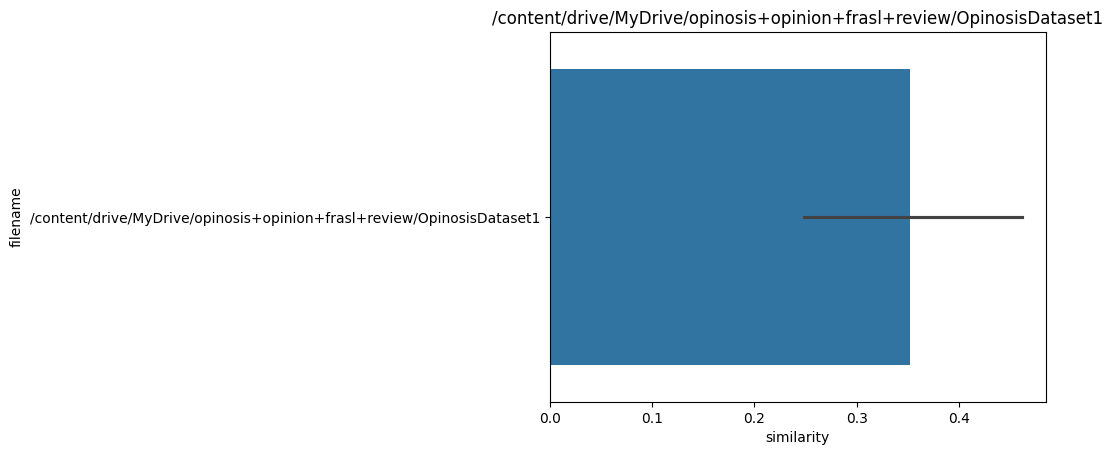

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df)
plt.title(comparison_docname)

<한글 텍스트 처리>

In [1]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 29.8 MB/s eta 0:00:00


In [3]:
import pandas as pd

train_df=pd.read_csv('ratings_train.txt',sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


1이 긍정감성, 0이 부정감성

In [4]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [5]:
import re

train_df=train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함)
train_df['document']=train_df['document'].apply(lambda x:re.sub(r'\d+','',x))

#테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df=pd.read_csv('ratings_test.txt',sep='\t')
test_df=test_df.fillna(' ')
test_df['document']=test_df['document'].apply(lambda x:re.sub(r'\d+','',x))

#id칼럼 삭제
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [6]:
from konlpy.tag import Twitter

twitter=Twitter()
def tw_tokenizer(text):
  #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 변환
  tokens_ko=twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Twitter 객체의 morphs()객체를 이용한 tokenizer를 사용, ngram_range는 (1,2)
tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train=tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [8]:
#로지스틱 회귀를 이용해 감성 분석 수행
lg_clf=LogisticRegression(random_state=0)
#파라미터 C최적화를 위해 GridSearchCV를 이용
params={'C':[1,3.5,4.5,5.5,10]}

grid_cv=GridSearchCV(lg_clf,param_grid=params,cv=3,scoring='accuracy',verbose=1)
grid_cv.fit(tfidf_matrix_train,train_df['label'])
print(grid_cv.best_params_,round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8592


In [10]:
from sklearn.metrics import accuracy_score

#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF값으로 피처 변환함
tfidf_matrix_test=tfidf_vect.transform(test_df['document'])

#classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
preds=best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도: 0.8615
